In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read data
star_array = np.loadtxt('stardata.txt')

In [3]:
star_array

array([[ 0.3789082,  0.1036832, -1.       ],
       [ 0.6977842, -0.2200489,  1.       ],
       [ 0.4290627, -0.2872655,  1.       ],
       ...,
       [ 0.5818457,  0.789753 , -1.       ],
       [ 0.2167672, -0.2097826,  1.       ],
       [-0.5409362,  0.2760008, -1.       ]])

In [4]:
star_array.shape

(600, 3)

In [5]:
# set up x,y
x = star_array[:,[0,1]]
y = star_array[:,2]

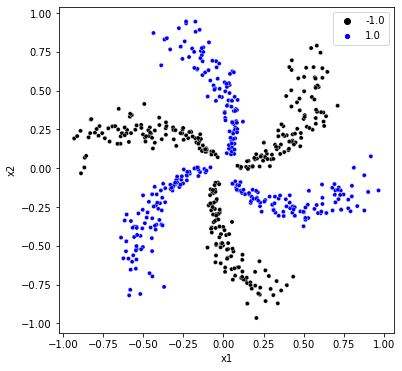

In [9]:
plt.figure(figsize=(6,6)) 
sns.scatterplot(x=x[:,0], y=x[:,1], hue=y, size=1, palette=['black','blue'])
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

Recall the points are described by $(r, k\frac{\pi}{6}+r + 0.1r\epsilon)$ in polar coordinates. We do map:
$$(x_1,x_2)\rightarrow \bigg(\cos\big(3(\phi-r/2)\big),\sin\big(3(\phi-r/2)\big)\bigg).$$
This is because we can do Swiss Roll for $(r, k\frac{\pi}{6}+r/2 + 0.1r\epsilon)$, then the inner transformation $\phi\rightarrow \phi-r/2$ will transform our case into the case we know an answer for.

In [7]:
## define the nonlinear map
def nlmap(x):
    rho = np.sqrt(x[:,0]**2 + x[:,1]**2)
    phi = np.arctan2(x[:,1],x[:,0])
    xx = np.zeros(x.shape)
    xx[:,0] = np.cos(3*(phi-rho/2))
    xx[:,1] = np.sin(3*(phi-rho/2))
    return xx

x_map = nlmap(x)

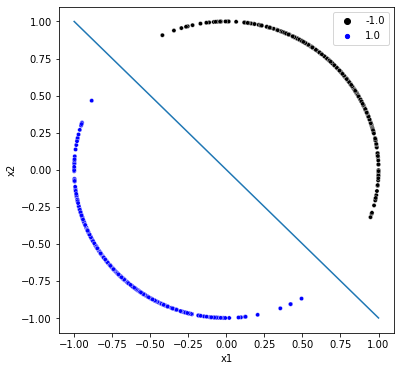

In [8]:
# plot
plt.figure(figsize=(6,6))

sns.scatterplot(x=x_map[:,0], y=x_map[:,1], hue=y, size=1, palette=['black','blue'])
sns.lineplot(x=[1,-1], y=[-1,1])

plt.xlabel('x1')
plt.ylabel('x2')
plt.show()